 ### 생선분류 문제

In [1]:
### 도미와 빙어 분류하기(도미 찾기)
# - 독립변수 : 임의 특성을 가지는 데이터들(여러개)
# - 종속변수 : 임의 특성에 대한 정답을 가지는 데이터(이진, 다중 데이터 사용)
# - 변수 : 특성(컬럼, 항목, 퓨처, 특성 모두 같은 의미)
#        : 머신러닝에서는 특성 또는 항목이라고 표현
#        : 딥러닝에서는 퓨처라고 표현
#        : 데이터분석에서는 컬럼, 변수라고 표현

### 훈련(학습)을 시키는 시점을 기준으로
# - 지도학습 : 종속변수(정답)을 알려주고 학습을 시키는 방법
# - 비지도학습 : 종속변수(정답)을 알려주지 않고 학습을 시키는 방법

In [2]:
### 머신러닝 순서
# - 데이터 수집(전처리 등이 완료)
# - 데이터 분리 : 훈련(학습)데이터 vs 테스트데이터
#   데이터 분리 : 훈련(학습)데이터 vs 검증데이터 vs 테스트데이터
# - 데이터 분리 비율 : 훈련(75%) vs 테스트(25%)
#                    : 훈련(70%) vs 테스트(30%)
#                    : 훈련(60%) vs 검증(20%) vs 테스트(20%)
# - 데이터 훈련(학습) : fit() 함수 사용
# - 데이터 검증 : 훈련시 사용(훈련에 대한 1차 테스트)
# - 데이터 테스트 : preditc() 함수 사용 (훈련에 대한 최종 테스트)

In [3]:
### 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

### 도미의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [17]:
print(bream_length)
print(bream_weight)
print(len(bream_length))

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
35


In [10]:
### 머신러닝에서는 데이터의 분포 확인이 필요함
# - 선형인지 비선형인지 확인 후 진행
# - 분포 확인은 : 산점도(scatter) 시각화를 진행
# - x축 : 길이, y축 : 무게 로 시각화
### 시각화 라이브러리
import matplotlib.pyplot as plt

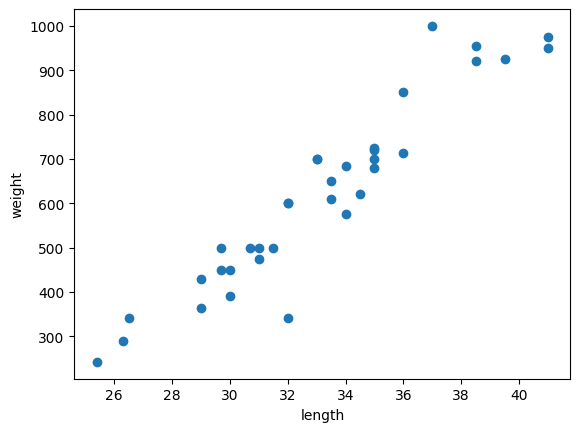

In [16]:
### 산점도(scatter) 시각화 그리기
plt.scatter(bream_length, bream_weight)

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

### (해석)
# - 도미 35마리를 x축과 y축으로 하는 2차원 산점도 그래프
# - 도미의 길이기 길수록 -> 무게가 커지는 분포를 보임(우상향 분포)
# - 산점도의 흐름이 직성에 가까운 분포를 보이는 경우 -> 선형(linear)라고 칭함
# - 길이와 무게는 선형관계를 나타냄(패턴)

In [18]:
### 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

### 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [19]:
print(smelt_length)
print(smelt_weight)
print(len(smelt_length))

[9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
14


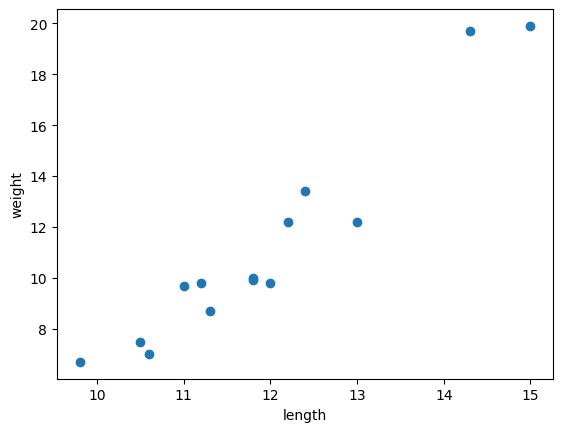

In [20]:
# 산점도(scatter) 시각화 그리기
plt.scatter(smelt_length, smelt_weight)

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

### (해석)
# - 빙어 데이터도 도미 데이터와 유사하게 길이가 커질수록 무게가 커지는
#   비례(우상향) 분포를 나타냄
# - 중간에 떨어져 있는 부분이 보이기는 하지만,
# - 전체적인 분포는 선형(linear)분포를 보이고 있음
# - 좌하단의 분포는 약간의 곡선을 보임

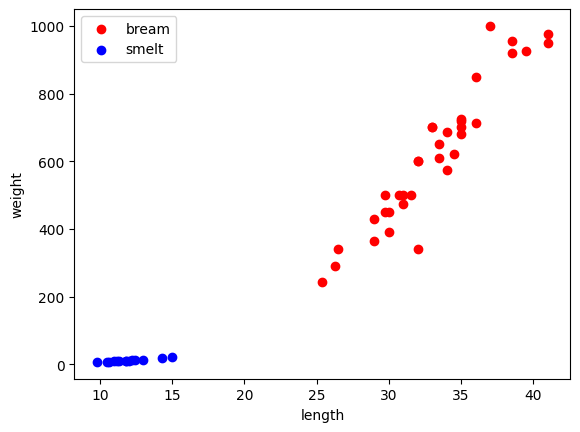

In [22]:
### 도미와 빙어 데이터 각각의 분포로는 시각적 분류가 안됨
# - 동시에 비교하기 위해서 두개의 산점도 그래프를 하나로 시각화 하기

### 산점도(scatter) 시각화 그리기
# - 도미 데이터
plt.scatter(bream_length, bream_weight, c="red", label="bream")
# - 빙어 데이터
plt.scatter(smelt_length, smelt_weight, c="blue", label="smelt")

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

In [25]:
### 훈련을 위해서 두개의 데이터셋을 하나의 데이터셋으로 합치기

### 각각의 특성을 먼저 하나로 만들기
### 길이
length = bream_length + smelt_length 

### 무게
weight = bream_weight + smelt_weight 

In [29]:
print(length)
print(weight)
print(len(length))

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
49


In [39]:
### 데이터 훈련을 위해서는 2차원(행렬) 데이터로 생성해야 함
# [[길이, 무게], [길이, 무게]......]
# [길이, 무게] 한셋트가 행이 됩니다.
# 길이와 무게 각각은 열이 됩니다.

### 2차원 데이터셋 변수명 : fish_data
# (방법1)
fish_data = []
for l, w in zip(length, weight) :
    fish_data.append([l, w])

# (방법2)
fish_data = [[l, w] for l, w in zip(length, weight)]

print(len(fish_data))
fish_data

49


[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [40]:
### 길이와 무게 데이터를 이용해서 도미와 빙어를 구분하는 규칙을 찾아내기 위해
# - 지도학습기반을 진행 : 정답(종속변수) 생성
# - 둘중에 하나를 찾는 분류 : 이진분류 라고 칭함
# - 이진분류에 사용되는 데이터 값의 형태 : 0 또는 1
# - 찾고자 하는 값을 주로 1로 정하며, 이외 값은 0으로 처리
# - 종속변수는 1차원으로 만듭니다.

In [50]:
### 종속변수 만들기(특성 변수를 만든다고 보면됨)
# - 도미를 찾는다고 가정할 때 : 도미 종속변수는 1
# - 빙어는 0 으로 종속변수 생성
# - 변수명은 보통 target 이라는 명칭을 사용함
# - 우리가 사용할 종속변수명 : fish_target
 
fish_target = [1] * 35 + [0] * 14
print(len(fish_target))
print(fish_target)

49
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [51]:
### 독립변수(특성 데이터)
print(fish_data)
### 종속변수(특성에 대한 정답 데이터)
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 훈련 시키기

In [52]:
### 사용할 머신러닝 패키지 불러들이기
# - Classifier : 분류 모델(클래스)
from sklearn.neighbors import KNeighborsClassifier

In [53]:
### 클래스 객체 생성하기
# - 보통 클래스를 모델이라고 칭합니다.
# - K-NN(K-최근접 이웃 분류 클래스)
#    - 내부적으로는 K-최근접 이웃 분류 알고리즘을 사용함
#    - 알고리즘 : 이웃의 갯수 중에 주어진 특성이 어디에 가장 가까운지를
#               : 가까운 이웃들의 비율을 이용하여 정해짐
# - 이웃의 갯수 : 기본(default) 값은 5개
# - 이웃의 갯수는 : 홀수값으로 지정합니다.
kn = KNeighborsClassifier()
kn

KNeighborsClassifier()

In [54]:
### 훈련 시키기
# - 훈련을 시키기 위함 함수 : fit() 사용
# - fit(특성데이터, 정답데이터)
# - fit(독립변수, 종속변수)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [55]:
### 학습능력 평가하기(공부를 얼마나 잘했는지)
# - 결과값 : 구분을 얼마나 잘 할 수 있는지에 대한 기준이 됨
# - 부류 모델 평가 함수 : score(독립변수, 종속변후)
# - score()에 사용하는 데이터는 검증 또는 테스트 데이터를 삳용하게 됨
# - score()의 결과값을 정확도(accuracty)라고 칭함
# - 정확도 계산 = 훈련중 맞춘 정답갯수 / 전체 갯수
# - 정확도 해석 : 1에 가까울수록 정확도가 높으며(훈련이 잘됨),
#                 0에 가까울수록 정확도가 낮음(훈련이 잘 안됨)
# - 정확도는 1이 나오면 안됨..(과대적합이라는 표현을 사용함)
# - 훈련 모델을 사용할 수 있냐, 없냐의 판단은 1보다 작으며,
#   0.9~0.99의 정확도를 보일때 매우 좋은 모델이라고 판단함.
# - 다만, 훈련모델에 사용된 데이터를 이용한 기존 정확도가 있다면,
#   그보다 높으면 좋은 모델이라고 평가할 수 있음
kn.score(fish_data, fish_target)

1.0

### 임의 데이터 넣기

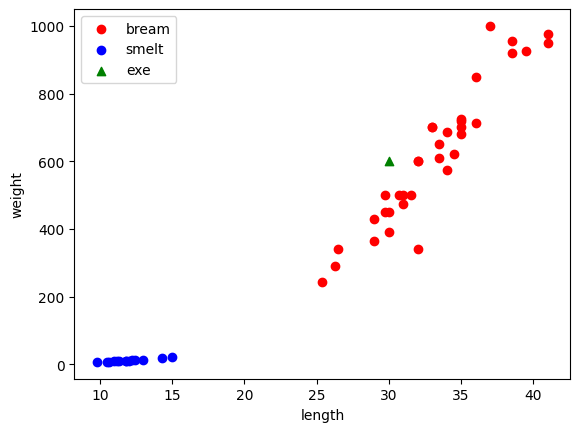

In [56]:
### 산점도(scatter) 시각화 그리기
# - 도미 데이터
plt.scatter(bream_length, bream_weight, c="red", label="bream")
# - 빙어 데이터
plt.scatter(smelt_length, smelt_weight, c="blue", label="smelt")

# - 임의 생선 한개 추가
plt.scatter(30, 600, c="green", label="exe", marker="^")

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

### 예측하기

In [57]:
### 예측에 사용되는 함수 : predict()
# - 예측에 사용되는 데이터는 보통 테스트 데이터 사용
# - 임의 데이터 : 테스트 데이터
# - 예측을 할때는 : 종속변수를 넣지 않습니다.
kn.predict([[30, 600]])

array([1])

In [58]:
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [59]:
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

### 이웃의 갯수 지정하기

In [63]:
### 가장 가까운 이웃의 갯수 중에 어느쪽에 분포가 더 많은지를
#   확인하여 밚은쪽의 종속변수를 따르게 됨
# - 모델(클래스) 속성을 하이퍼파라메터 라고 칭합니다.
# - 하이퍼파라메터 : 사람이 직접 속성값을 지짗해 주는 변수들
#                  : 훈련에 영향을 미치는 속성
# - 하이퍼파라메터의 값에 따라서 -> 훈련의 정확도에 영향을 미침
# - n_KNeighbors : 이웃의 갯수 (지정하지 않으면, 기본=5개 사용)
kn49 = KNeighborsClassifier(n_neighbors=25)
kn49

KNeighborsClassifier(n_neighbors=25)

In [64]:
### 훈련 시키기
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=25)

In [65]:
### 훈련 정확도 확인하기
kn49.score(fish_data, fish_target)

0.9795918367346939

In [67]:
### 모델(클래스) 생성 및 훈련 이후 이웃의 갯수를 수정하는 방법
# - 정확도를 확인하는 방법
kn49.n_neighbors = 1
kn49.score(fish_data, fish_target)

1.0

In [80]:
### 이웃의 갯수를 1~49까지 수정 반복하면서
# - 정확도 확인하기
kn = 0
for n in range(1, len(fish_target), 2) :
    kn49.n_neighbors = n
    score = kn49.score(fish_data, fish_target)
    
    if score < 1 :
        print(n, "->", score)
        kn = n
        break
kn        

19 -> 0.9795918367346939


19

In [81]:
kn_end = KNeighborsClassifier(n_neighbors=kn)
kn_end.fit(fish_data, fish_target)
kn_end.score(fish_data, fish_target)
# (해석)
### 이웃의 갯수 19개에 대한 최적화된 KNN모델 선정

0.9795918367346939

In [ ]:
### score() : 내부적으로 fit()이 수행되면서 정확도 계산을 합니다.
# 모델의 하이퍼파라메터 값이 변경이 안되면, 변경안된 것으로 훈련
# 변경되면 변경된 값으로 훈련되면서 정확도 계산됨
# - 내부적으로 훈련을 시키기 때문에 일반적으로 테스트 데이터는
#   정확도에 사용되지 않고, 검증 데이터를 사용함
# - 테스트 데이터를 사용할 경우, 훈련에 집중된 결과를 얻을수 있음